# The Critics Critique Results Analysis

## 0. import Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. import Data

In [19]:
all_test = pd.read_csv('../data/all_test.csv')

In [21]:
all_test.head()

,site,url_link,author,game,company,genre,platform,text,score,stars,stars_mean,score_label
0,meristation,https://as.com/meristation/2008/12/22/analisis...,Javier de Pascual,Metal Gear Solid Mobile,Konami,"Acción, Tactical",NGE,"Por alguna extraña razón, cuando el jugón trad...",8.5,"[[{'label': '3 stars', 'score': 0.435262888669...",3.60,'4 starts'
1,meristation,https://as.com/meristation/2012/12/19/analisis...,Pablo González,THE DENPA MEN: They Came By Wave,None,RPG,3DS,Nintendo 3DS ha apostado desde su primer día e...,7.2,"[[{'label': '3 stars', 'score': 0.421717613935...",3.20,'4 starts'
2,meristation,https://as.com/meristation/2019/09/03/analisis...,David Arroyo,Telling Lies,Annapurna Interactive,Aventura,PC PS4 XBO NSW,Hablar de Telling Lies es un poco complicado. ...,8.0,"[[{'label': '3 stars', 'score': 0.415306359529...",3.50,'4 starts'
3,meristation,https://as.com/meristation/2014/10/06/analisis...,Salva Fernàndez,Titanfall: IMC Rising,None,"Acción, First Person Shooter",PC 360 XBO,Titanfall recibe el último contenido descargab...,7.0,"[[{'label': '3 stars', 'score': 0.483339041471...",3.25,'4 starts'
4,meristation,https://as.com/meristation/2014/04/16/analisis...,None,Moebius: Empire Rising,None,Aventura Gráfica,PC OSX IPH IPD AND,"“Aquellos que no pueden recordar el pasado, es...",6.8,"[[{'label': '4 stars', 'score': 0.495593637228...",3.20,'3 starts'


In [22]:
def score_half(score):
    return score / 2

In [23]:
all_test['score_adj'] = all_test['score'].apply(lambda x: score_half(x))

In [24]:
all_test.head(3)

,site,url_link,author,game,company,genre,platform,text,score,stars,stars_mean,score_label,score_adj
0,meristation,https://as.com/meristation/2008/12/22/analisis...,Javier de Pascual,Metal Gear Solid Mobile,Konami,"Acción, Tactical",NGE,"Por alguna extraña razón, cuando el jugón trad...",8.5,"[[{'label': '3 stars', 'score': 0.435262888669...",3.6,'4 starts',4.25
1,meristation,https://as.com/meristation/2012/12/19/analisis...,Pablo González,THE DENPA MEN: They Came By Wave,None,RPG,3DS,Nintendo 3DS ha apostado desde su primer día e...,7.2,"[[{'label': '3 stars', 'score': 0.421717613935...",3.2,'4 starts',3.60
2,meristation,https://as.com/meristation/2019/09/03/analisis...,David Arroyo,Telling Lies,Annapurna Interactive,Aventura,PC PS4 XBO NSW,Hablar de Telling Lies es un poco complicado. ...,8.0,"[[{'label': '3 stars', 'score': 0.415306359529...",3.5,'4 starts',4.00


## 2. Data Analysis

### 2.1 Score Deviation
As the difference in percentage between adjusted score and computed score.

In [25]:
all_test_reduced = all_test[['site', 'author', 'game', 'score', 'score_adj', 'stars_mean', 'score_label']]

In [26]:
all_test_reduced.head()

,site,author,game,score,score_adj,stars_mean,score_label
0,meristation,Javier de Pascual,Metal Gear Solid Mobile,8.5,4.25,3.60,'4 starts'
1,meristation,Pablo González,THE DENPA MEN: They Came By Wave,7.2,3.60,3.20,'4 starts'
2,meristation,David Arroyo,Telling Lies,8.0,4.00,3.50,'4 starts'
3,meristation,Salva Fernàndez,Titanfall: IMC Rising,7.0,3.50,3.25,'4 starts'
4,meristation,None,Moebius: Empire Rising,6.8,3.40,3.20,'3 starts'


In [27]:
all_test_reduced['score_deviation'] = (all_test_reduced['stars_mean'] - all_test_reduced['score_adj']) / all_test_reduced['score_adj'] * 100

/home/sergio/miniconda3/envs/lab_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [29]:
all_test_reduced.groupby('site')['score_deviation'].mean()

site
3D Juegos     -3.240488
Gamereactor   -1.507370
Vandal        -6.605534
meristation   -6.395963
revogamers     2.011905
Name: score_deviation, dtype: float64

### 2.2 Plot Score Deviation

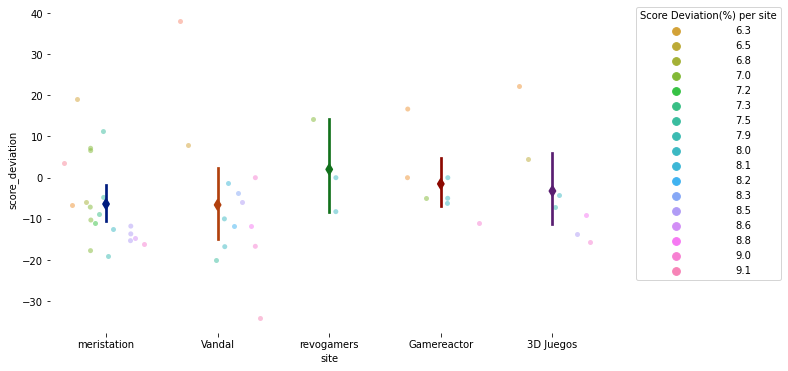

In [118]:
fig, ax = plt.subplots(figsize=(10,6))

sns.despine(bottom=True, left=True)
sns.pointplot(x="site", y="score_deviation", data=all_test_reduced, join=False, palette="dark", markers="d")

sns.stripplot(x="site", y="score_deviation", hue="score",
              data=all_test_reduced, dodge=True, alpha=.5, zorder=0.5)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="Score Deviation(%) per site", handletextpad=5, frameon=True,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

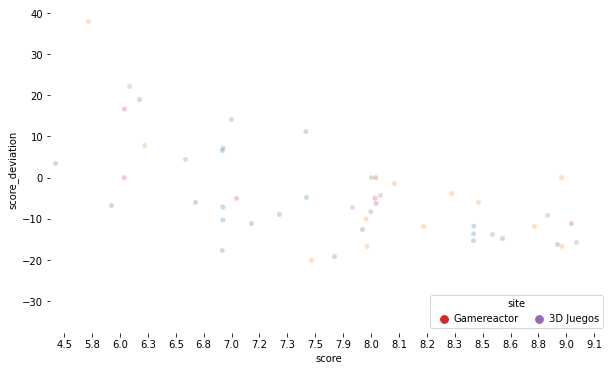

In [108]:
fig, ax = plt.subplots(figsize=(10,6))

sns.despine(bottom=True, left=True)
sns.stripplot(x="score", y="score_deviation", hue="site",
              data=all_test_reduced, dodge=True, alpha=.25, zorder=1)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="site",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)
plt.show()

## 3. Streamlit Dashboard Code

In [ ]:
import streamlit as st

st.title('The Critics Critique App')
st.header('Introduction')
st.subheader('Steps')
st.text('This is an example')
st.latex('y = x²')
st.code('if a == 1:\n    print(a)', language='python')
st.markdown("This is **text** with markdown")